In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv('c:/Users/Admin/Documents/Data Set/DL Dataset/ANN/bee_data.csv')
data.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file             5172 non-null   object
 1   date             5172 non-null   object
 2   time             5172 non-null   object
 3   location         5172 non-null   object
 4   zip code         5172 non-null   int64 
 5   subspecies       5172 non-null   object
 6   health           5172 non-null   object
 7   pollen_carrying  5172 non-null   bool  
 8   caste            5172 non-null   object
dtypes: bool(1), int64(1), object(7)
memory usage: 328.4+ KB


In [4]:
data.isnull().sum()

file               0
date               0
time               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
dtype: int64

In [5]:
data.columns

Index(['file', 'date', 'time', 'location', 'zip code', 'subspecies', 'health',
       'pollen_carrying', 'caste'],
      dtype='object')

In [6]:
data['date']=pd.to_datetime(data['date'])
data['day']=data['date'].dt.day
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year

In [7]:
data=data.drop(['date','file','zip code'],axis=1)

In [8]:
data['pollen_carrying'].value_counts()

False    5154
True       18
Name: pollen_carrying, dtype: int64

In [9]:
data['location'].value_counts()

Saratoga, CA, USA       2000
Des Moines, IA, USA      973
Alvin, TX, USA           737
Athens, GA, USA          579
Athens, Georgia, USA     472
New Orleans, LA, USA     170
San Jose, CA, USA        149
Keene, NH, USA            92
Name: location, dtype: int64

In [10]:
data['health'].value_counts()

healthy                       3384
few varrao, hive beetles       579
Varroa, Small Hive Beetles     472
ant problems                   457
hive being robbed              251
missing queen                   29
Name: health, dtype: int64

In [11]:
data['subspecies'].value_counts()

Italian honey bee        3008
Russian honey bee         527
Carniolan honey bee       501
1 Mixed local stock 2     472
-1                        428
VSH Italian honey bee     199
Western honey bee          37
Name: subspecies, dtype: int64

In [12]:
dummy_location=pd.get_dummies(data['location'],drop_first=True)

In [13]:
dummy_health=pd.get_dummies(data['health'],drop_first=True)

In [14]:
dummy_subspecies=pd.get_dummies(data['subspecies'],drop_first=True)

In [15]:
data.head()

,time,location,subspecies,health,pollen_carrying,caste,day,month,year
0,16:07,"Alvin, TX, USA",-1,hive being robbed,False,worker,28,8,2018
1,16:07,"Alvin, TX, USA",-1,hive being robbed,False,worker,28,8,2018
2,16:07,"Alvin, TX, USA",-1,hive being robbed,False,worker,28,8,2018
3,16:07,"Alvin, TX, USA",-1,hive being robbed,False,worker,28,8,2018
4,16:07,"Alvin, TX, USA",-1,hive being robbed,False,worker,28,8,2018


In [16]:
data['day'].value_counts()

21    1080
6      924
19     501
18     496
17     433
2      362
7      321
28     228
10     211
16     170
20     149
8      127
25      92
3       50
13      28
Name: day, dtype: int64

In [17]:
data['month'].value_counts()

8    4416
7     733
9      23
Name: month, dtype: int64

In [18]:
data['year'].value_counts()

2018    5172
Name: year, dtype: int64

In [19]:
data['caste'].value_counts()

worker    5172
Name: caste, dtype: int64

In [20]:
data=data.drop(['year','caste'],axis=1)
data.head()

,time,location,subspecies,health,pollen_carrying,day,month
0,16:07,"Alvin, TX, USA",-1,hive being robbed,False,28,8
1,16:07,"Alvin, TX, USA",-1,hive being robbed,False,28,8
2,16:07,"Alvin, TX, USA",-1,hive being robbed,False,28,8
3,16:07,"Alvin, TX, USA",-1,hive being robbed,False,28,8
4,16:07,"Alvin, TX, USA",-1,hive being robbed,False,28,8


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


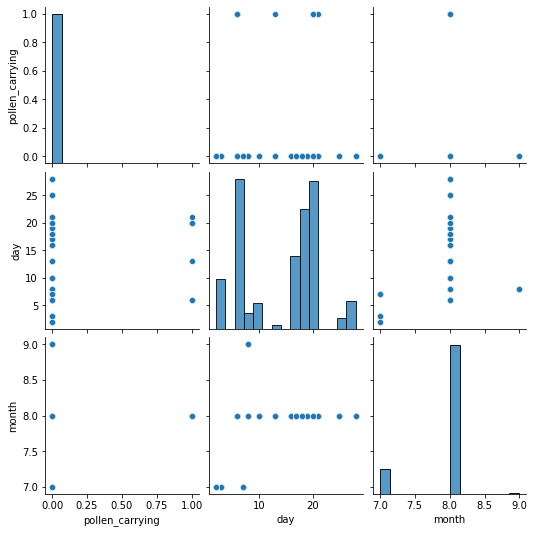

In [21]:
sn.pairplot(data)

<AxesSubplot:>

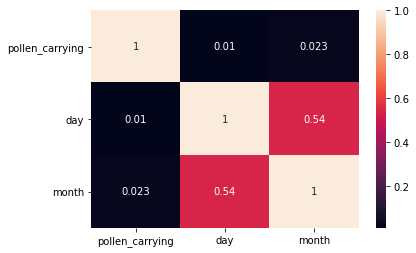

In [22]:
sn.heatmap(data.corr(),annot=True)

In [23]:
data['time']=pd.to_datetime(data['time'])
data['hour']=data['time'].dt.hour

In [24]:
data['hour'].value_counts()

12    1139
15     976
13     938
9      519
17     433
19     303
16     254
8      170
11     157
14     129
21     104
10      38
18      12
Name: hour, dtype: int64

In [25]:
data['minutes']=data['time'].dt.minute
data['minutes'].value_counts()

56    882
30    769
19    763
0     541
46    489
50    433
54    230
7     181
20    180
21    124
57    114
55    111
13    104
10     50
53     41
49     29
36     24
8      23
48     19
25     18
47     15
35     15
3      10
11      7
Name: minutes, dtype: int64

In [26]:
data=data.drop(['time','location','health'],axis=1)

In [27]:
data=pd.concat([dummy_location,dummy_health,dummy_subspecies,data['minutes'],data['hour'],data['pollen_carrying']],axis=1)

In [28]:
data.head()

,"Athens, GA, USA","Athens, Georgia, USA","Des Moines, IA, USA","Keene, NH, USA","New Orleans, LA, USA","San Jose, CA, USA","Saratoga, CA, USA",ant problems,"few varrao, hive beetles",healthy,...,missing queen,1 Mixed local stock 2,Carniolan honey bee,Italian honey bee,Russian honey bee,VSH Italian honey bee,Western honey bee,minutes,hour,pollen_carrying
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,16,False
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,16,False
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,16,False
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,16,False
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,16,False


In [29]:
x=data.drop(['pollen_carrying'],axis=1)
y=data['pollen_carrying']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
xtrain.head()

,"Athens, GA, USA","Athens, Georgia, USA","Des Moines, IA, USA","Keene, NH, USA","New Orleans, LA, USA","San Jose, CA, USA","Saratoga, CA, USA",ant problems,"few varrao, hive beetles",healthy,hive being robbed,missing queen,1 Mixed local stock 2,Carniolan honey bee,Italian honey bee,Russian honey bee,VSH Italian honey bee,Western honey bee,minutes,hour
801,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,50,17
1288,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,56,12
1558,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,56,15
2407,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,30,15
2617,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,30,15


In [33]:
ytrain.head()

801     False
1288    False
1558    False
2407    False
2617    False
Name: pollen_carrying, dtype: bool

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [35]:
xtrain

array([[-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
         0.85455491,  1.19794436],
       [-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
         1.16455659, -0.52098773],
       [ 2.84089434, -0.31788145, -0.49458272, ..., -0.09345386,
         1.16455659,  0.51037153],
       ...,
       [-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
        -1.36712383,  0.85415794],
       [-0.35200183, -0.31788145,  2.02190646, ..., -0.09345386,
        -1.72879246, -1.55234699],
       [-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
         0.85455491,  1.19794436]])

In [36]:
xtest

array([[ 2.84089434, -0.31788145, -0.49458272, ..., -0.09345386,
         1.16455659,  0.51037153],
       [-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
         1.11288964, -0.86477415],
       [-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
         1.16455659, -0.52098773],
       ...,
       [-0.35200183, -0.31788145,  2.02190646, ..., -0.09345386,
         0.64788712, -0.52098773],
       [-0.35200183, -0.31788145, -0.49458272, ..., -0.09345386,
         1.16455659, -0.52098773],
       [ 2.84089434, -0.31788145, -0.49458272, ..., -0.09345386,
         1.16455659,  0.51037153]])

In [37]:
xtrain.shape

(3465, 20)

In [38]:
!pip install keras

In [39]:
!pip install tensorflow

In [40]:
import keras

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation,Embedding,Flatten
from keras.activations import relu,sigmoid
from keras.layers import ReLU,LeakyReLU,PReLU,ELU


In [42]:
ann = Sequential()

In [43]:
ann.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=20))
ann.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
ann.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [44]:
ann.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
reg = ann.fit(xtrain,ytrain,validation_split=0.0,batch_size=10,epochs=100)

Epoch 1/100
347/347 [==============================] - 1s 1ms/step - loss: 0.2214 - accuracy: 0.9663
Epoch 2/100
347/347 [==============================] - 0s 961us/step - loss: 0.0335 - accuracy: 0.9978
Epoch 3/100
347/347 [==============================] - 0s 898us/step - loss: 0.0216 - accuracy: 0.9980
Epoch 4/100
347/347 [==============================] - 0s 891us/step - loss: 0.0226 - accuracy: 0.9974
Epoch 5/100
347/347 [==============================] - 0s 723us/step - loss: 0.0219 - accuracy: 0.9973
Epoch 6/100
347/347 [==============================] - 0s 819us/step - loss: 0.0190 - accuracy: 0.9975
Epoch 7/100
347/347 [==============================] - 0s 890us/step - loss: 0.0171 - accuracy: 0.9977
Epoch 8/100
347/347 [==============================] - 0s 898us/step - loss: 0.0166 - accuracy: 0.9973
Epoch 9/100
347/347 [==============================] - 0s 861us/step - loss: 0.0130 - accuracy: 0.9981
Epoch 10/100
347/347 [==============================] - 0s 1ms/step - loss:

347/347 [==============================] - 0s 770us/step - loss: 0.0127 - accuracy: 0.9975
Epoch 81/100
347/347 [==============================] - 0s 746us/step - loss: 0.0091 - accuracy: 0.9983
Epoch 82/100
347/347 [==============================] - 0s 741us/step - loss: 0.0128 - accuracy: 0.9972
Epoch 83/100
347/347 [==============================] - 0s 740us/step - loss: 0.0081 - accuracy: 0.9985
Epoch 84/100
347/347 [==============================] - 0s 686us/step - loss: 0.0078 - accuracy: 0.9985
Epoch 85/100
347/347 [==============================] - 0s 811us/step - loss: 0.0102 - accuracy: 0.9975
Epoch 86/100
347/347 [==============================] - 0s 906us/step - loss: 0.0067 - accuracy: 0.9986
Epoch 87/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9980
Epoch 88/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9976
Epoch 89/100
347/347 [==============================] - 0s 756us/step - loss: 0.0

In [48]:
y_pred = ann.predict(xtest)
y_pred = y_pred > 0.5

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
print(confusion_matrix(ytest,y_pred))

[[1697    0]
 [  10    0]]


In [52]:
accuracy_score(ytest,y_pred)

0.994141769185706